<a href="https://colab.research.google.com/github/Aaditya-Chunekar/LetterBoxd-Rating-Prediction/blob/main/boxd_rating_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Path of the file to read
#prompt: use movies.csv from current drive directory

mov_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/movies.csv')
mov_data.dropna(inplace=True)
mov_data.columns

Index(['id', 'name', 'date', 'tagline', 'description', 'minute', 'rating'], dtype='object')

In [ ]:
y=mov_data.rating
# mae RF : 0.35698480754015666
pre_feats=['minute','date']
# BETTERmae DT mln=62 : 0.3291591961358398
x=mov_data[pre_feats]
#add other features for trial later

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(x, y, random_state=1)

In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

62


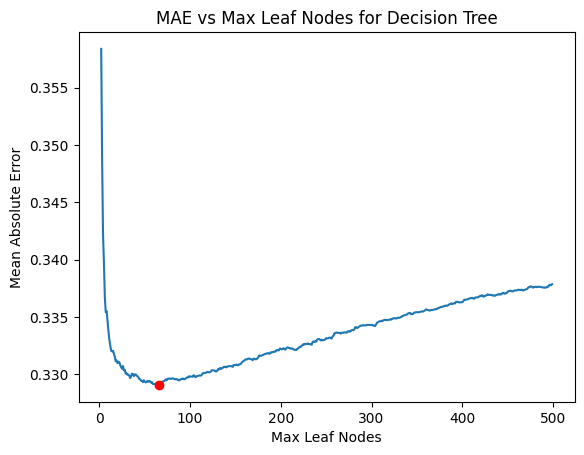

In [ ]:
# prompt: add code to plot mae for 1 to 100 max_leaf_nodes and generate graph

import matplotlib.pyplot as plt

# Compare MAE with differing values of max_leaf_nodes
list_mae = []
for max_leaf_nodes in range(2, 500):
    list_mae.append(get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y))

# Find the index of the minimum MAE
min_mae_index = list_mae.index(min(list_mae))
best_max_leaf_nodes = range(2, 500)[min_mae_index]
min_mae_value = list_mae[min_mae_index]
print(min_mae_index-2)


# Plotting the results
plt.plot(range(2, 500), list_mae)
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Mean Absolute Error")
plt.title("MAE vs Max Leaf Nodes for Decision Tree")

# Add a red dot at the point of minimum MAE
plt.plot(best_max_leaf_nodes, min_mae_value, 'ro') # 'ro' means red dot

plt.show()

In [ ]:
# b,e = 2,1000
# while(b+1<e):
#   mid=(b+e)//2
#   print(b,"\t",e)
#   if(get_mae(mid-1,train_X, val_X, train_y, val_y)<get_mae(mid+1,train_X, val_X, train_y, val_y)):
#     e=mid
#   else:
#     b=mid

#   print(f"max_leaf_nodes={mid} :\t {get_mae(mid,train_X, val_X, train_y, val_y)}")

2 	 1000
max_leaf_nodes=501 :	 0.33780717247556136
2 	 501
max_leaf_nodes=251 :	 0.3331275797513212
251 	 501
max_leaf_nodes=376 :	 0.3358591741619765
251 	 376
max_leaf_nodes=313 :	 0.3346947323166828
251 	 313
max_leaf_nodes=282 :	 0.3341045324112786
251 	 282
max_leaf_nodes=266 :	 0.33354268699419737
266 	 282
max_leaf_nodes=274 :	 0.33374941182746615
266 	 274
max_leaf_nodes=270 :	 0.33365380819622725
266 	 270
max_leaf_nodes=268 :	 0.33363670598816075
266 	 268
max_leaf_nodes=267 :	 0.3336112360942902


In [ ]:
for i in [25,50,100,200,400,450]:
  print(f" mae for max_leaf_nodes={i} :\t {get_mae(i,train_X, val_X, train_y, val_y)}")

 mae for max_leaf_nodes=25 :	 0.33048475676963307
 mae for max_leaf_nodes=50 :	 0.32936833271612576
 mae for max_leaf_nodes=100 :	 0.329792766875107
 mae for max_leaf_nodes=200 :	 0.3322203675958341
 mae for max_leaf_nodes=400 :	 0.33629441844389857
 mae for max_leaf_nodes=450 :	 0.33718988434850267


In [ ]:
model = DecisionTreeRegressor(max_leaf_nodes=62, random_state=0)
model.fit(train_X, train_y)
preds_val = model.predict(val_X)
mae = mean_absolute_error(val_y, preds_val)
print(mae)
val_X['predictions']=preds_val
comparison_df = val_X.copy()
comparison_df['actual_rating'] = val_y
display(comparison_df[['predictions', 'actual_rating']])

0.3291591961358398


,predictions,actual_rating
31903,3.261178,3.60
102705,2.926033,2.72
33661,3.411724,3.43
97383,3.118417,2.60
58079,3.262024,3.26
...,...,...
23621,3.118417,3.43
25734,3.058847,2.94
59907,3.156439,3.37
3191,3.347606,3.64


In [ ]:
rf_model = RandomForestRegressor()

# fit your model
rf_model.fit(train_X, train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))



In [ ]:
val_X['prediction'] = rf_val_predictions
comparison_df = val_X.copy()
comparison_df['actual_rating'] = val_y
display(comparison_df[['prediction', 'actual_rating']])